## Data Visualization: Energy Consumption by DPE Rating

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import contextily as ctx
from scipy.stats import mstats

In [4]:
Data  = pd.read_csv('C:/Users/msi/Desktop/projetAgir/data/data-final.csv')
Data

,N°DPE,Etiquette_GES,Type_bâtiment,Classe_inertie_bâtiment,Adresse,Etiquette_DPE,N°_région_(BAN),Nom Commune,Code_postal_(brut),Conso_5_usages_é_finale_énergie_n°1,...,Température maximale,Température minimale,Date,Saison,Année_y,Température moyenne annuelle,Centile_25%,Centile_50% (Médiane),Centile_75%,Code Département
0,2374E0428703N,D,appartement,Très lourde,7 RUE DES CHARMILLES,D,84.0,annecy,74960,16482.9,...,8.6,2.2,2018-01-01,Hiver,2018,12.083333,4.875,12.55,18.375,74.0
1,2374E0428703N,D,appartement,Très lourde,7 RUE DES CHARMILLES,D,84.0,annecy,74960,16482.9,...,4.0,-1.1,2018-02-01,Hiver,2018,12.083333,4.875,12.55,18.375,74.0
2,2374E0428703N,D,appartement,Très lourde,7 RUE DES CHARMILLES,D,84.0,annecy,74960,16482.9,...,10.7,1.4,2018-03-01,Printemps,2018,12.083333,4.875,12.55,18.375,74.0
3,2374E0428703N,D,appartement,Très lourde,7 RUE DES CHARMILLES,D,84.0,annecy,74960,16482.9,...,20.9,6.8,2018-04-01,Printemps,2018,12.083333,4.875,12.55,18.375,74.0
4,2374E0428703N,D,appartement,Très lourde,7 RUE DES CHARMILLES,D,84.0,annecy,74960,16482.9,...,21.9,10.7,2018-05-01,Printemps,2018,12.083333,4.875,12.55,18.375,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90011,2386E3704884Y,C,appartement,Lourde,16 RUE HENRI DUNANT,C,75.0,poitiers,86000,8390.0,...,27.1,14.9,2023-08-01,Été,2023,13.583333,8.925,13.10,20.275,86.0
90012,2386E3704884Y,C,appartement,Lourde,16 RUE HENRI DUNANT,C,75.0,poitiers,86000,8390.0,...,27.9,15.1,2023-09-01,Automne,2023,13.583333,8.925,13.10,20.275,86.0
90013,2386E3704884Y,C,appartement,Lourde,16 RUE HENRI DUNANT,C,75.0,poitiers,86000,8390.0,...,21.6,10.4,2023-10-01,Automne,2023,13.583333,8.925,13.10,20.275,86.0
90014,2386E3704884Y,C,appartement,Lourde,16 RUE HENRI DUNANT,C,75.0,poitiers,86000,8390.0,...,13.0,6.5,2023-11-01,Automne,2023,13.583333,8.925,13.10,20.275,86.0


In [5]:
Data.columns

Index(['N°DPE', 'Etiquette_GES', 'Type_bâtiment', 'Classe_inertie_bâtiment',
       'Adresse', 'Etiquette_DPE', 'N°_région_(BAN)', 'Nom Commune',
       'Code_postal_(brut)', 'Conso_5_usages_é_finale_énergie_n°1',
       'Conso_chauffage_é_finale_énergie_n°1',
       'Type_énergie_principale_chauffage', 'Conso_chauffage_é_primaire',
       'Conso_5_usages_é_primaire', 'Chauffage_électrique', 'Année_x',
       'Code IRIS', 'Nom IRIS', 'Numéro de voie', 'Indice de répétition',
       'Type de voie', 'Libellé de voie', 'Code Commune', 'Segment de client',
       'Nombre de logements',
       'Consommation annuelle totale de l'adresse (MWh)',
       'Consommation annuelle moyenne par logement de l'adresse (MWh)',
       'Consommation annuelle moyenne de la commune (MWh)', 'Code EPCI',
       'Code Région', 'Tri des adresses', 'Température moyenne mensuelle',
       'Température maximale', 'Température minimale', 'Date', 'Saison',
       'Année_y', 'Température moyenne annuelle', 'Centile_2

In [6]:
print("\nUnique etiquette in DPE:", Data['Etiquette_DPE'].unique())


Unique etiquette in DPE: ['D' 'F' 'C' 'G' 'E' 'B' 'A']


In [7]:
# 1. Ordonner les classes DPE
dpe_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Data['Etiquette_DPE'] = pd.Categorical(Data['Etiquette_DPE'], categories=dpe_order, ordered=True)

# 2. Gérer les valeurs extrêmes (outliers)
col_conso = "Consommation annuelle moyenne par logement de l'adresse (MWh)"
Data[col_conso] = mstats.winsorize(Data[col_conso], limits=[0.01, 0.01])

# 3. Regrouper les types de bâtiments rares
building_counts = Data['Type_bâtiment'].value_counts()
Data['Type_bâtiment'] = Data['Type_bâtiment'].where(building_counts[Data['Type_bâtiment']].values >= 50, 'Autres')

###  Boxplot de consommation par DPE

C:\Users\msi\AppData\Local\Temp\ipykernel_8852\3538183364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


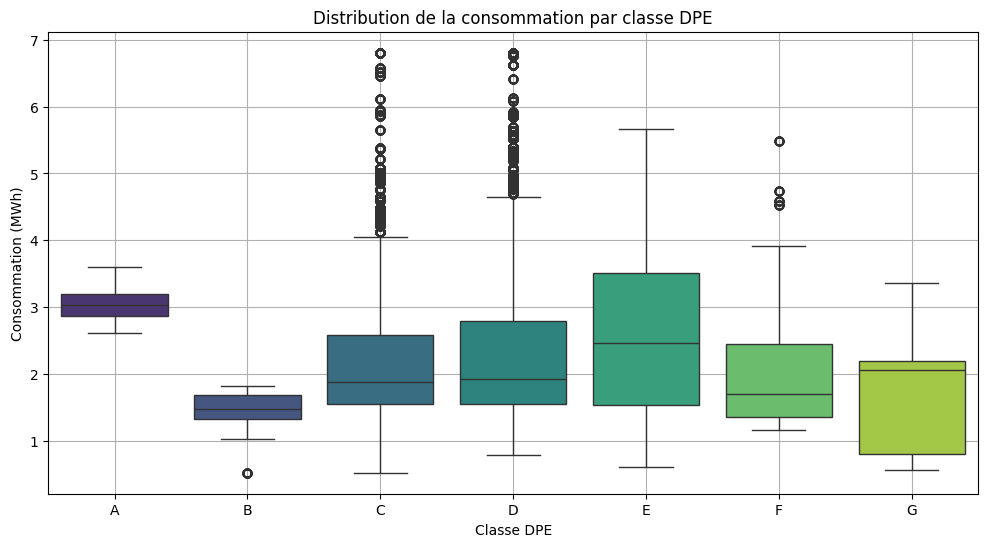

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Etiquette_DPE',
    y=col_conso,
    data=Data,
    palette="viridis"
)
plt.title('Distribution de la consommation par classe DPE')
plt.xlabel('Classe DPE')
plt.ylabel('Consommation (MWh)')
plt.grid(True)
plt.show()

### Diagramme en barres (moyenne par DPE et type de bâtiment)

C:\Users\msi\AppData\Local\Temp\ipykernel_8852\1679765822.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Data.groupby(['Etiquette_DPE', 'Type_bâtiment'])[col_conso].mean().unstack().plot(


<Figure size 1400x700 with 0 Axes>

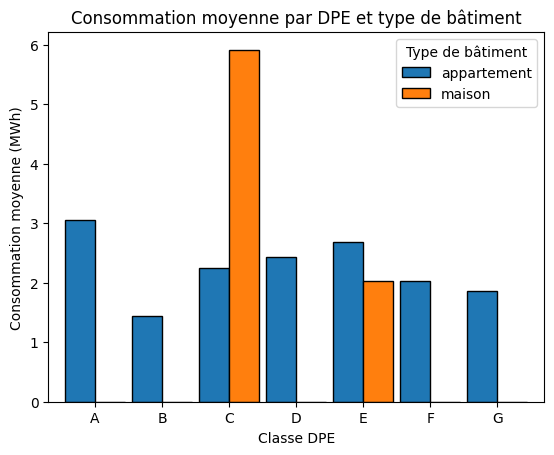

In [9]:
plt.figure(figsize=(14, 7))
Data.groupby(['Etiquette_DPE', 'Type_bâtiment'])[col_conso].mean().unstack().plot(
    kind='bar',
    width=0.9,
    edgecolor='black'
)
plt.title('Consommation moyenne par DPE et type de bâtiment')
plt.xlabel('Classe DPE')
plt.ylabel('Consommation moyenne (MWh)')
plt.legend(title='Type de bâtiment')
plt.xticks(rotation=0)
plt.show()

### Heatmap (DPE × Région)

C:\Users\msi\AppData\Local\Temp\ipykernel_8852\190713573.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_region = Data.pivot_table(


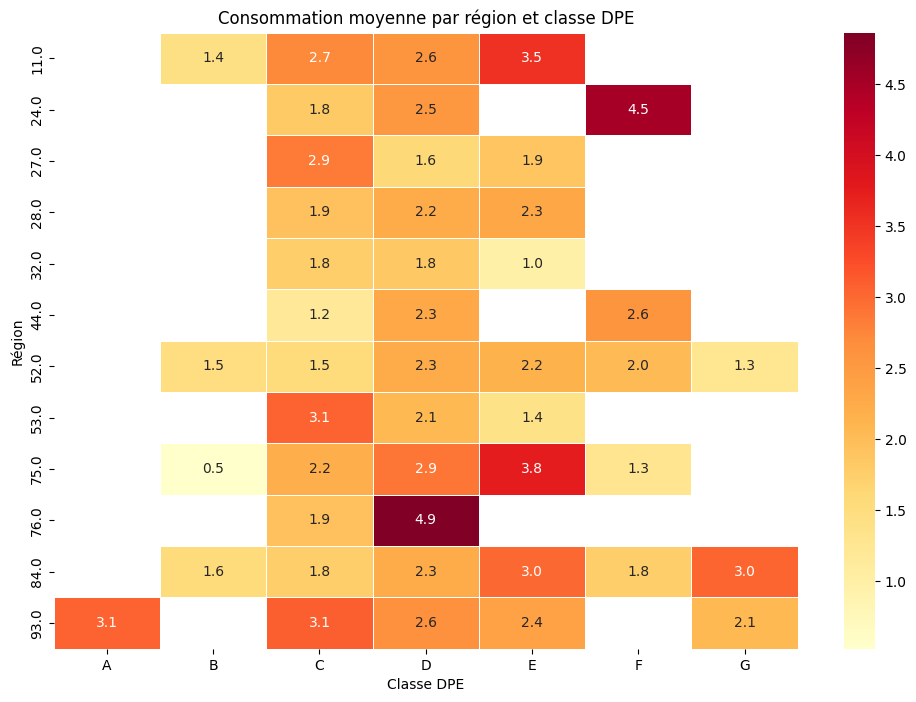

In [12]:
pivot_region = Data.pivot_table(
    index='N°_région_(BAN)',
    columns='Etiquette_DPE',
    values=col_conso,
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_region[dpe_order],  # Ordonné A-G
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5
)
plt.title('Consommation moyenne par région et classe DPE')
plt.xlabel('Classe DPE')
plt.ylabel('Région')
plt.show()

### Courbe d'évolution temporelle


C:\Users\msi\AppData\Local\Temp\ipykernel_8852\406326987.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


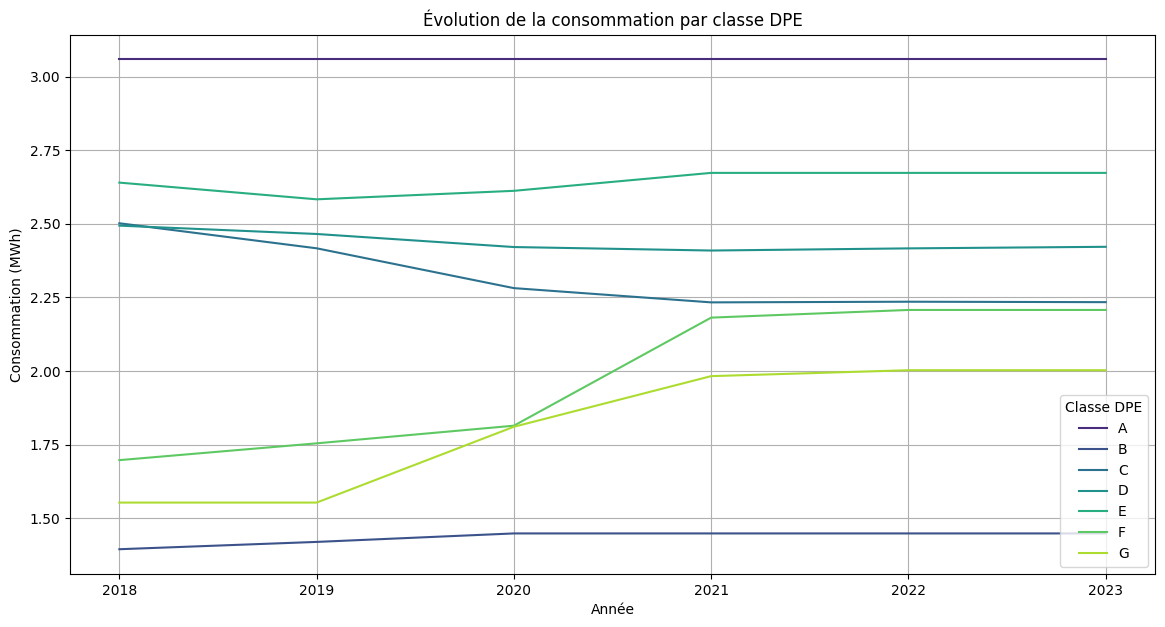

In [14]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    x='Année_y',
    y=col_conso,
    hue='Etiquette_DPE',
    data=Data,
    palette='viridis',
    ci=None,
    hue_order=dpe_order
)
plt.title('Évolution de la consommation par classe DPE')
plt.xlabel('Année')
plt.ylabel('Consommation (MWh)')
plt.grid(True)
plt.legend(title='Classe DPE')
plt.show()